In [1]:
# loading libraries

import io

import folium
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from folium.plugins import FastMarkerCluster
from PIL import Image

In [2]:
# Display all df columns
pd.set_option("display.max_columns", None)

# Set up with a higher resolution screen
%config InlineBackend.figure_format = 'retina'

In [3]:
pd.set_option("display.max_columns", None)

In [4]:
df_2002_2021s = pd.read_csv("./assets/csv/df_clusters.csv", sep=",")

In [5]:
count_perc = (
    df_2002_2021s.groupby("cluster")[["count", "percentage"]].sum().reset_index()
)

In [6]:
count_perc

,cluster,count,percentage
0,1,1550707,17.72
1,2,2338474,26.72
2,3,2117470,24.20
3,4,1653230,18.89
4,5,148016,1.70
5,6,495725,5.65
6,7,234609,2.69
7,8,213611,2.34


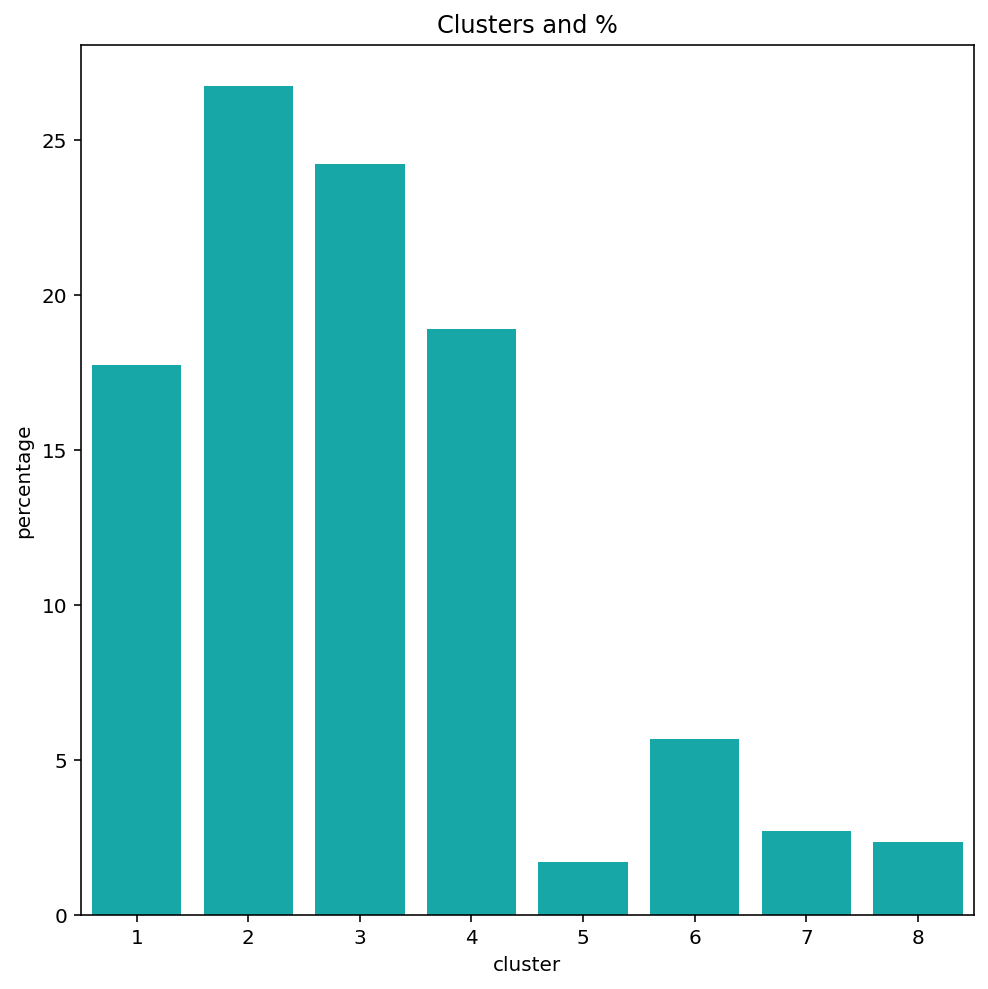

In [7]:
# Set up with a higher resolution screen (useful on Mac)
%config InlineBackend.figure_format = 'retina'

plt.figure(figsize=(8, 8))
plt.title("Clusters and %")
# Plot DataFrame
sns.barplot(x="cluster", y="percentage", data=count_perc, color="c")
plt.show()

In [74]:
df_all_years = pd.read_csv(
    "./assets/csv/df_all_years/df_all_years.csv", sep=","
).drop(columns="Unnamed: 0.1")

In [75]:
df_all_years.head(2)

,Unnamed: 0,icao_carrier,iata_carrier,flight,flight_step,icao_origin,iata_origin,dep_airport_name,dep_city,dep_state,dep_region,sched_date,sched_year,sched_month,sched_day,dep_time,dep_date,dep_year,dep_month,dep_day,dep_week_day,reference_month,icao_dest,iata_dest,arr_airport_name,arr_city,arr_state,arr_region,arr_time,arr_date,arr_year,arr_month,arr_day,icao_aircraft_type,aircraft_model,fuel_consumption_l,payload_kg,flight_distance_km,flight_hrs,flight_speed_avg,seats_available,seats_sold,seats_free,pax_baggage_free_kg,pax_baggage_paid_kg,cargo_paid_kg,cargo_mail_kg,cargo_free_kg,aircraft_freight_kg,pax_free_km,cargo_paid_km,cargo_free_km,cargo_mail_km,baggage_free_km,baggage_paid_km,available_seat_km,revenue_pax_km,available_tonne_km,revenue_tonne_km,flight_unique_nr,route_icao,route_iata,lat_dd_origin,long_dd_origin,cluster_origin,lat_dd_dest,long_dd_dest,cluster_dest
0,0,GLO,G3,1720,2,SBCT,CWB,Afonso Pena,São José Dos Pinhais,PR,5,2002-09-02,2002,9,2,17:46:00,2002-09-02,2002,9,2,1,SETEMBRO,SBSP,CGH,Congonhas,São Paulo,SP,4,18:41:00,2002-09-02,2002,9,2,B737,BOEING 737-700 (WINGLETS) PAX,2225.0,15947,331.0,0.92,360.18,144,136.0,0.0,598,800,0.0,0.0,0.0,11598.0,0.0,0,0,0,197938,264800,47664,45016,5278,5278,1720_2,SBCT-SBSP,CWB-CGH,-25.5317,-49.1761,4,-23.6261,-46.6564,2
1,1,GLO,G3,1735,4,SBCT,CWB,Afonso Pena,São José Dos Pinhais,PR,5,2002-09-10,2002,9,10,NaN,NaN,0,0,0,0,SETEMBRO,SBMH,NaN,Maringá,Maringá,PR,5,NaN,NaN,0,0,0,B737,BOEING 737-700 (WINGLETS) PAX,2386.0,15947,367.0,1.00,1.00,144,57.0,0.0,258,0,10.0,0.0,0.0,4543.0,0.0,3670,0,0,94686,0,52848,20919,5852,5852,1735_4,SBCT-SBMH,NaN,-25.5317,-49.1761,4,-23.4794,-52.0122,6


In [76]:
df_all_years['total_pax'] = df_all_years['seats_sold'] + df_all_years['seats_free']

In [77]:
print(sorted(df_all_years.seats_available.unique()))

[0, 1, 2, 8, 9, 10, 19, 20, 22, 27, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 212, 213, 214, 216, 217, 218, 219, 220, 221, 223, 224, 225, 226, 228, 229, 233, 238, 239, 240, 241, 242, 243, 244, 245, 247, 

In [78]:
len(df_all_years)

8751683

In [165]:
df_clusters = df_all_years.copy()

In [166]:
drop_zero = [0, 1, 2]

In [167]:
df_clusters = df_clusters[df_clusters.seats_available.isin(drop_zero) == False]

In [168]:
len(df_clusters)

8741147

In [169]:
df_clusters = df_clusters.groupby(["cluster_origin"], as_index=False).agg(
    origins=("icao_origin", lambda x: x.nunique()),
    destinations=("icao_dest", lambda x: x.nunique()),
    carriers=("icao_carrier", lambda x: x.nunique()),
    routes=("route_icao", lambda x: x.nunique()),
    total_flights=("icao_carrier", 'count'),
    aircraft_types=("icao_aircraft_type", lambda x: x.nunique()),
    mean_aircraft_capacity=("seats_available", 'mean'),
    total_pax=("seats_available", 'sum')
).round(2)

In [170]:
df_clusters

,cluster_origin,origins,destinations,carriers,routes,total_flights,aircraft_types,mean_aircraft_capacity,total_pax
0,1,2,93,17,140,1549113,35,160.45,248560949
1,2,5,101,21,236,2334850,37,156.55,365527778
2,3,6,140,22,293,2115615,38,136.34,288448450
3,4,15,115,24,349,1651637,34,146.66,242234969
4,5,3,38,16,53,147873,28,143.31,21192119
5,6,16,103,19,241,494901,28,120.69,59730108
6,7,16,66,17,146,233744,25,103.91,24288732
7,8,172,167,20,588,213414,26,69.62,14858827


In [171]:
df_clusters.origins = [2, 5, 6, 14, 3, 14, 14, 168]

In [172]:
df_clusters['flights_per_month'] = round(df_clusters['total_flights'] / 228, 2)

In [173]:
df_clusters['flights_month_origin'] = round(df_clusters['flights_per_month'] / df_clusters['origins'], 2)

In [174]:
df_clusters['pax_per_month'] = round(df_clusters['total_pax'] / 228, 2)

In [175]:
df_clusters['pax_month_origin'] = round(df_clusters['pax_per_month'] / df_clusters['origins'], 2)

In [176]:
df_clusters.drop(columns=['total_flights', 'total_pax', 'flights_per_month', 'pax_per_month'], inplace=True)

In [177]:
df_clusters

,cluster_origin,origins,destinations,carriers,routes,aircraft_types,mean_aircraft_capacity,flights_month_origin,pax_month_origin
0,1,2,93,17,140,35,160.45,3397.18,545089.80
1,2,5,101,21,236,37,156.55,2048.11,320638.40
2,3,6,140,22,293,38,136.34,1546.50,210854.13
3,4,14,115,24,349,34,146.66,517.43,75888.15
4,5,3,38,16,53,28,143.31,216.19,30982.63
5,6,14,103,19,241,28,120.69,155.04,18712.44
6,7,14,66,17,146,25,103.91,73.23,7609.25
7,8,168,167,20,588,26,69.62,5.57,387.92


In [179]:
# players

In [185]:
players = df_all_years.copy()

In [186]:
players.head(2)

,Unnamed: 0,icao_carrier,iata_carrier,flight,flight_step,icao_origin,iata_origin,dep_airport_name,dep_city,dep_state,dep_region,sched_date,sched_year,sched_month,sched_day,dep_time,dep_date,dep_year,dep_month,dep_day,dep_week_day,reference_month,icao_dest,iata_dest,arr_airport_name,arr_city,arr_state,arr_region,arr_time,arr_date,arr_year,arr_month,arr_day,icao_aircraft_type,aircraft_model,fuel_consumption_l,payload_kg,flight_distance_km,flight_hrs,flight_speed_avg,seats_available,seats_sold,seats_free,pax_baggage_free_kg,pax_baggage_paid_kg,cargo_paid_kg,cargo_mail_kg,cargo_free_kg,aircraft_freight_kg,pax_free_km,cargo_paid_km,cargo_free_km,cargo_mail_km,baggage_free_km,baggage_paid_km,available_seat_km,revenue_pax_km,available_tonne_km,revenue_tonne_km,flight_unique_nr,route_icao,route_iata,lat_dd_origin,long_dd_origin,cluster_origin,lat_dd_dest,long_dd_dest,cluster_dest,total_pax
0,0,GLO,G3,1720,2,SBCT,CWB,Afonso Pena,São José Dos Pinhais,PR,5,2002-09-02,2002,9,2,17:46:00,2002-09-02,2002,9,2,1,SETEMBRO,SBSP,CGH,Congonhas,São Paulo,SP,4,18:41:00,2002-09-02,2002,9,2,B737,BOEING 737-700 (WINGLETS) PAX,2225.0,15947,331.0,0.92,360.18,144,136.0,0.0,598,800,0.0,0.0,0.0,11598.0,0.0,0,0,0,197938,264800,47664,45016,5278,5278,1720_2,SBCT-SBSP,CWB-CGH,-25.5317,-49.1761,4,-23.6261,-46.6564,2,136.0
1,1,GLO,G3,1735,4,SBCT,CWB,Afonso Pena,São José Dos Pinhais,PR,5,2002-09-10,2002,9,10,NaN,NaN,0,0,0,0,SETEMBRO,SBMH,NaN,Maringá,Maringá,PR,5,NaN,NaN,0,0,0,B737,BOEING 737-700 (WINGLETS) PAX,2386.0,15947,367.0,1.00,1.00,144,57.0,0.0,258,0,10.0,0.0,0.0,4543.0,0.0,3670,0,0,94686,0,52848,20919,5852,5852,1735_4,SBCT-SBMH,NaN,-25.5317,-49.1761,4,-23.4794,-52.0122,6,57.0


In [187]:
players_cluster_1 = players[players.cluster_origin == 1]

In [197]:
teste = players.groupby(['cluster_origin', "icao_carrier", 'sched_year'], as_index=False).agg(
    icao_carrier_count=('icao_carrier', 'count'),
    total_pax=("seats_available", 'sum')
)

In [210]:
airline = {
    'AZU':'Azul',
    'BRB':'Bra',
    'GLO':'Gol',
    'IPM':'Itapemirim',
    'NES':'Nordeste',
    'ONE':'Avianca Brasil',
    'OWT':'Two',
    'PTB':'Passaredo',
    'PTN':'Pantanal',
    'RSL':'Rio Sul',
    'SLX':'Sete',
    'TAM':'Latam',
    'TIB':'Trip',
    'VRG':'VARIG',
    'VRN':'Vrg',
    'VSP':'VASP',
    'WEB':'Webjet',
    'FYW':'FlyWays',
    'NHG':'Brava (former NHT)',
    'NRA':'Noar',
    'PAM':'MAP',
    'TSD':'Taf',
    'TIM':'Team',
    'SBA':'Sol',
    'SUL':'Asta',
    'TTL':'Total'
}

In [213]:
teste["airline"] = teste["icao_carrier"].apply(lambda x: airline[x])

In [214]:
teste

,cluster_origin,icao_carrier,sched_year,icao_carrier_count,total_pax,airline
0,1,AZU,2010,344,39248,Azul
1,1,AZU,2011,1274,146744,Azul
2,1,AZU,2012,2461,283486,Azul
3,1,AZU,2013,9136,1059897,Azul
4,1,AZU,2014,21925,2412422,Azul
...,...,...,...,...,...,...
874,8,VRG,2004,18,1312,VARIG
875,8,VRG,2005,47,6016,VARIG
876,8,VRN,2009,5,715,Vrg
877,8,VSP,2003,50,5350,VASP


In [215]:
teste.to_csv('./assets/csv/tableau/players_all_years.csv', sep=',')

In [191]:
years = [2002, 2003, 2004, 2005, 2006, 2007, 2008]

In [194]:
mkt_share_flights = players[players.sched_year.isin(years) == False]

In [195]:
mkt_share_flights.head(2)

,Unnamed: 0,icao_carrier,iata_carrier,flight,flight_step,icao_origin,iata_origin,dep_airport_name,dep_city,dep_state,dep_region,sched_date,sched_year,sched_month,sched_day,dep_time,dep_date,dep_year,dep_month,dep_day,dep_week_day,reference_month,icao_dest,iata_dest,arr_airport_name,arr_city,arr_state,arr_region,arr_time,arr_date,arr_year,arr_month,arr_day,icao_aircraft_type,aircraft_model,fuel_consumption_l,payload_kg,flight_distance_km,flight_hrs,flight_speed_avg,seats_available,seats_sold,seats_free,pax_baggage_free_kg,pax_baggage_paid_kg,cargo_paid_kg,cargo_mail_kg,cargo_free_kg,aircraft_freight_kg,pax_free_km,cargo_paid_km,cargo_free_km,cargo_mail_km,baggage_free_km,baggage_paid_km,available_seat_km,revenue_pax_km,available_tonne_km,revenue_tonne_km,flight_unique_nr,route_icao,route_iata,lat_dd_origin,long_dd_origin,cluster_origin,lat_dd_dest,long_dd_dest,cluster_dest,total_pax
1504740,0,AZU,AD,4090,1,SBCT,CWB,Afonso Pena,São José Dos Pinhais,PR,5,2009-02-24,2009,2,24,18:57:00,2009-02-24,2009,2,24,2,FEVEREIRO,SBKP,VCP,Viracopos,Campinas,SP,4,20:04:00,2009-02-24,2009,2,24,E190,EMBRAER 190,2500.0,11622,349.0,1.12,311.39,106,73.0,0.0,590,27,0.0,0.0,0.0,6092.0,0.0,0,0,0,205910,9423,36994,25477,4056,4056,4090_1,SBCT-SBKP,CWB-VCP,-25.5317,-49.1761,4,-23.0069,-47.1344,3,73.0
1504741,1,AZU,AD,4082,1,SBCT,CWB,Afonso Pena,São José Dos Pinhais,PR,5,2009-02-25,2009,2,25,08:16:00,2009-02-25,2009,2,25,3,FEVEREIRO,SBKP,VCP,Viracopos,Campinas,SP,4,09:19:00,2009-02-25,2009,2,25,E190,EMBRAER 190,2500.0,11651,349.0,1.05,332.15,106,133.0,1.0,567,116,0.0,0.0,0.0,10733.0,349.0,0,0,0,197883,40484,36994,46417,4066,4066,4082_1,SBCT-SBKP,CWB-VCP,-25.5317,-49.1761,4,-23.0069,-47.1344,3,134.0
